In [1]:
import requests
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from time import sleep
import pandas as pd

In [2]:
url = 'https://www.imdb.com/list/ls009668711/'
driver = webdriver.Chrome(executable_path='C:\programexe\chromedriver.exe')
driver.get(url)

In [3]:
movie_names = []

In [4]:
for i in range(1, 101):
    names = driver.find_element_by_xpath('/html/body/div[4]/div/div[2]/div[3]/div[1]/div/div[3]/div[3]/div['+str(i)+']/div[2]/h3/a')
    movie_names.append(names.text)

In [5]:
movie_dates = []
movie_dates.clear()

In [6]:
for i in range(1, 101):
    dates = driver.find_element_by_xpath('/html/body/div[4]/div/div[2]/div[3]/div[1]/div/div[3]/div[3]/div['+str(i)+']/div[2]/h3/span[2]')
    movie_dates.append(int(dates.text.strip('(, ), (, I)')))

In [7]:
ratings = []
ratings.clear()

In [8]:
for i in range(1, 101):
    rating = driver.find_element_by_xpath('/html/body/div[4]/div/div[2]/div[3]/div[1]/div/div[3]/div[3]/div['+str(i)+']/div[2]/div[1]/div[1]/span[2]')
    ratings.append(float(rating.text))

In [9]:
durations = []
durations.clear()

In [10]:
for i in range(1, 101):
    duration = driver.find_element_by_xpath('/html/body/div[4]/div/div[2]/div[3]/div[1]/div/div[3]/div[3]/div['+str(i)+']/div[2]/p[1]/span[3]')
    durations.append(int(duration.text.strip(' min')))


In [11]:
descriptions = []

In [12]:
for i in range(1, 101):
    desc = driver.find_element_by_xpath('/html/body/div[4]/div/div[2]/div[3]/div[1]/div/div[3]/div[3]/div['+str(i)+']/div[2]/p[2]')
    descriptions.append(desc.text)


In [13]:
votes = []
votes.clear()

In [14]:
for i in range(1, 101):
    vote = driver.find_element_by_xpath('/html/body/div[4]/div/div[2]/div[3]/div[1]/div/div[3]/div[3]/div['+str(i)+']/div[2]/p[4]/span[2]')
    votes.append(int(vote.text.replace(',', "")))

In [15]:
grosss = []
grosss.clear()

In [16]:
from selenium.common.exceptions import NoSuchElementException

In [17]:

for i in range(1, 101):
    gros = driver.find_elements_by_xpath('/html/body/div[4]/div/div[2]/div[3]/div[1]/div/div[3]/div[3]/div['+str(i)+']/div[2]/p[4]/span[5]')
    
    if len(gros)>0:
        grosss.append(float(gros[0].text.strip('M, $')))
    else:
        grosss.append(None)



In [18]:
grosss[21:25]

[23.38, None, 136.8, 7.22]

In [19]:
Directors = []

In [20]:
for i in range(1, 101):
    director = driver.find_element_by_xpath('/html/body/div[4]/div/div[2]/div[3]/div[1]/div/div[3]/div[3]/div['+str(i)+']/div[2]/p[3]/a[1]')
    Directors.append(director.text)

In [21]:
genres = []

In [22]:
for i in range(1, 101):
    genre = driver.find_element_by_xpath('/html/body/div[4]/div/div[2]/div[3]/div[1]/div/div[3]/div[3]/div['+str(i)+']/div[2]/p[1]/span[5]')
    genres.append(genre.text)

In [23]:

actors_main = []
actors_main.clear()

In [24]:
for i in range(1, 101):
    actor = driver.find_element_by_xpath('/html/body/div[4]/div/div[2]/div[3]/div[1]/div/div[3]/div[3]/div['+str(i)+']/div[2]/p[3]/a[2]')
    actor1 = driver.find_element_by_xpath('/html/body/div[4]/div/div[2]/div[3]/div[1]/div/div[3]/div[3]/div['+str(i)+']/div[2]/p[3]/a[3]')
    actor2 = driver.find_element_by_xpath('/html/body/div[4]/div/div[2]/div[3]/div[1]/div/div[3]/div[3]/div['+str(i)+']/div[2]/p[3]/a[4]')
    actor3 = driver.find_element_by_xpath('/html/body/div[4]/div/div[2]/div[3]/div[1]/div/div[3]/div[3]/div['+str(i)+']/div[2]/p[3]/a[5]')
    main_actor = actor.text+ ", "+actor1.text+", "+actor2.text+", "+actor3.text
    actors_main.append(main_actor)

In [25]:
metascores = []
metascores.clear()

In [26]:
for i in range(1, 101):
    meta = driver.find_element_by_xpath('/html/body/div[4]/div/div[2]/div[3]/div[1]/div/div[3]/div[3]/div['+str(i)+']/div[2]/div[2]/span')
    metascores.append(int(meta.text))

In [27]:
datas = pd.DataFrame({
    "Names":movie_names,
    "Director names":Directors,
    "Actors":actors_main,
    "Dates":movie_dates,
    "genres": genres,
    "Votes":votes,
    "Durations":durations,
    "Ratings":ratings,
    "Metascores":metascores,
    "Gross":grosss
}, index=[i for i in range(1,101)])
datas.to_csv("100_movies.csv", index=[i for i in range(1,101)])

In [1]:
a = datas['Votes'].max()
a

NameError: name 'datas' is not defined

In [29]:
data_sorted_by_year = datas.sort_values(by=['Dates'], ascending=True)


In [30]:
new_data = datas[datas['Dates'] >= 2000]
sorted_by_year0 = new_data.sort_values(by=['Dates'])
new_data1 = datas[datas['Dates'] < 2000]
sorted_by_year1 = new_data1.sort_values(by=['Dates'])
datas1 = datas.sort_values(by=['Ratings'])


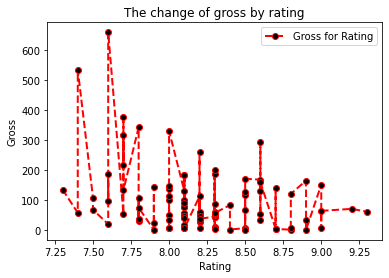

In [31]:
import matplotlib.pyplot as plt

width = 0.5
x = datas1['Ratings']
# x = sorted_by_year0['Dates']
# votes0 = sorted_by_year0['Durations'].tolist()
# votes1 = sorted_by_year1['Votes'].tolist()
#plt.plot(x, datas['Ratings'], width)
plt.plot(x, datas["Gross"], c='r', marker='o', linestyle='dashed',markerfacecolor='black',linewidth=2
,label="Gross for Rating")
plt.xlabel("Rating")
plt.ylabel("Gross")
plt.title("The change of gross by rating")
# plt.grid(True, linewidth= 1, linestyle="--")

#plt.scatter(x, datas['Metascores'])
#plt.annotate('local max', xy=(ymax), xytext=(ymax+5),
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             )
# plt.bar(x+width, votes1, width)
plt.legend()

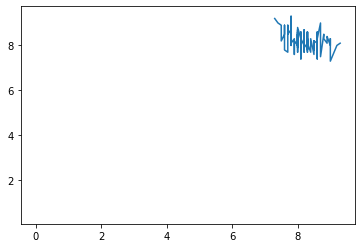

In [32]:
plt.plot(x, datas['Ratings'], width)


In [16]:
import pandas as pd
a = pd.read_csv("100_movies.csv")
max(a["Votes"])

# df[df.gender == False]
a[a.Durations == max(a["Durations"])]
# max(a["Votes"])
#max(a["Gross"])

,Unnamed: 0,Names,Director names,Actors,Dates,genres,Votes,Durations,Ratings,Metascores,Gross
29,30,1900,Bernardo Bertolucci,"Robert De Niro, Gérard Depardieu, Dominique Sa...",1976,"Drama, History",24888,317,7.7,70,NaN
